## In this kernel we convert LEVEL5 Lyft data (NuScenes format) to KITTI format, which is usually used in public repositories. After this, one can use repos working with the KITTI dataset to solve 3D detection tasks. 

In [1]:
#!pip install -qqq -U git+https://github.com/stalkermustang/nuscenes-devkit.git
!pip install -U git+https://github.com/lyft/nuscenes-devkit

In [2]:
from pathlib import Path
from PIL import Image

In [3]:
# dir with all input data from Kaggle
INP_DIR = Path('/kaggle/3d-object-detection-for-autonomous-vehicles')

In [4]:
# dir with index json tables (scenes, categories, logs, etc...)
TABLES_DIR = INP_DIR.joinpath('train_data')

In [5]:
# Adjust the dataroot parameter below to point to your local dataset path.
# The correct dataset path contains at least the following four folders (or similar): images, lidar, maps
!ln -s {INP_DIR}/train_images images
!ln -s {INP_DIR}/train_maps maps
!ln -s {INP_DIR}/train_lidar lidar

In [6]:
DATA_DIR = Path().absolute() 
# Empty init equals '.'.
# We use this because we link train dirs to current dir (cell above)

In [7]:
# dir to write KITTY-style dataset
STORE_DIR = DATA_DIR.joinpath('kitti_format')

In [8]:
!python -m lyft_dataset_sdk.utils.export_kitti nuscenes_gt_to_kitti -h

INFO: Showing help with the command 'export_kitti.py nuscenes_gt_to_kitti -- --help'.

NAME
    export_kitti.py nuscenes_gt_to_kitti - Converts nuScenes GT fromatted annotations to KITTI format.

SYNOPSIS
    export_kitti.py nuscenes_gt_to_kitti LYFT_DATAROOT TABLE_FOLDER <flags>

DESCRIPTION
    Converts nuScenes GT fromatted annotations to KITTI format.

POSITIONAL ARGUMENTS
    LYFT_DATAROOT
        Where lyft dataset stored (root dir).
    TABLE_FOLDER
        folder with tables (json files).

FLAGS
    --lidar_name=LIDAR_NAME
        Name of the lidar sensor. Only one lidar allowed at this moment.
    --get_all_detections=GET_ALL_DETECTIONS
        If True, will write all bboxes in PointCloud and use only FrontCamera.
    --parallel_n_jobs=PARALLEL_N_JOBS
        Number of threads to parralel processing.
    --samples_count=SAMPLES_COUNT
        Number of samples to convert.

NOTES
    You can also use flags syntax for POSITIONAL ARGUMENTS


In [3]:
!python -m lyft_dataset_sdk.utils.export_kitti nuscenes_gt_to_kitti -h

INFO: Showing help with the command 'export_kitti.py nuscenes_gt_to_kitti -- --help'.

NAME
    export_kitti.py nuscenes_gt_to_kitti - Converts nuScenes GT fromatted annotations to KITTI format.

SYNOPSIS
    export_kitti.py nuscenes_gt_to_kitti LYFT_DATAROOT TABLE_FOLDER <flags>

DESCRIPTION
    Converts nuScenes GT fromatted annotations to KITTI format.

POSITIONAL ARGUMENTS
    LYFT_DATAROOT
        Where lyft dataset stored (root dir).
    TABLE_FOLDER
        folder with tables (json files).

FLAGS
    --lidar_name=LIDAR_NAME
        Name of the lidar sensor. Only one lidar allowed at this moment.
    --get_all_detections=GET_ALL_DETECTIONS
        If True, will write all bboxes in PointCloud and use only FrontCamera.
    --parallel_n_jobs=PARALLEL_N_JOBS
        Number of threads to parralel processing.
    --samples_count=SAMPLES_COUNT
        Number of samples to convert.

NOTES
    You can also use flags syntax for POSITIONAL ARGUMENTS


In [9]:
# convert to KITTY-format
!python -m lyft_dataset_sdk.utils.export_kitti nuscenes_gt_to_kitti \
        --lyft_dataroot {DATA_DIR} \
        --table_folder {TABLES_DIR} \
        --samples_count 20 \
        --parallel_n_jobs 2 \
        --get_all_detections True \
        --store_dir {STORE_DIR}

9 category,
18 attribute,
4 visibility,
18421 instance,
10 sensor,
148 calibrated_sensor,
177789 ego_pose,
180 log,
180 scene,
22680 sample,
189504 sample_data,
638179 sample_annotation,
1 map,
Done loading in 8.7 seconds.
Reverse indexing ...
Done reverse indexing in 3.5 seconds.
100%|███████████████████████████████████████████| 20/20 [00:03<00:00,  6.18it/s]


In [10]:
# check created (converted) files. velodyne = LiDAR poinclouds data (in binary)
!ls {STORE_DIR}/velodyne | head -2

095d5bb88eb9cdd223b90d2a1475c0cf2f4b4c2a8aca82ba0ae51f6fba540440.bin
098ed5e4f46ffb242312eee1c9cfd47390bd1c91f5eb0189380ef429c00b40eb.bin


In [11]:
# render converted data for check. Currently don't support multithreading :(
!python -m lyft_dataset_sdk.utils.export_kitti render_kitti \
        --store_dir {STORE_DIR}

Rendering 3d boxes projected from 3d KITTI format
100%|███████████████████████████████████████████| 20/20 [00:43<00:00,  2.17s/it]


In [12]:
# Script above writes images to 'render' folder
# in store_dir (where we have converted the dataset)
RENDER_DIR = STORE_DIR.joinpath('render')

In [13]:
# get all rendered files
all_renders = list(RENDER_DIR.glob('*'))
all_renders.sort()

In [14]:
# render lidar (bird's eye view) and camera data with bboxes

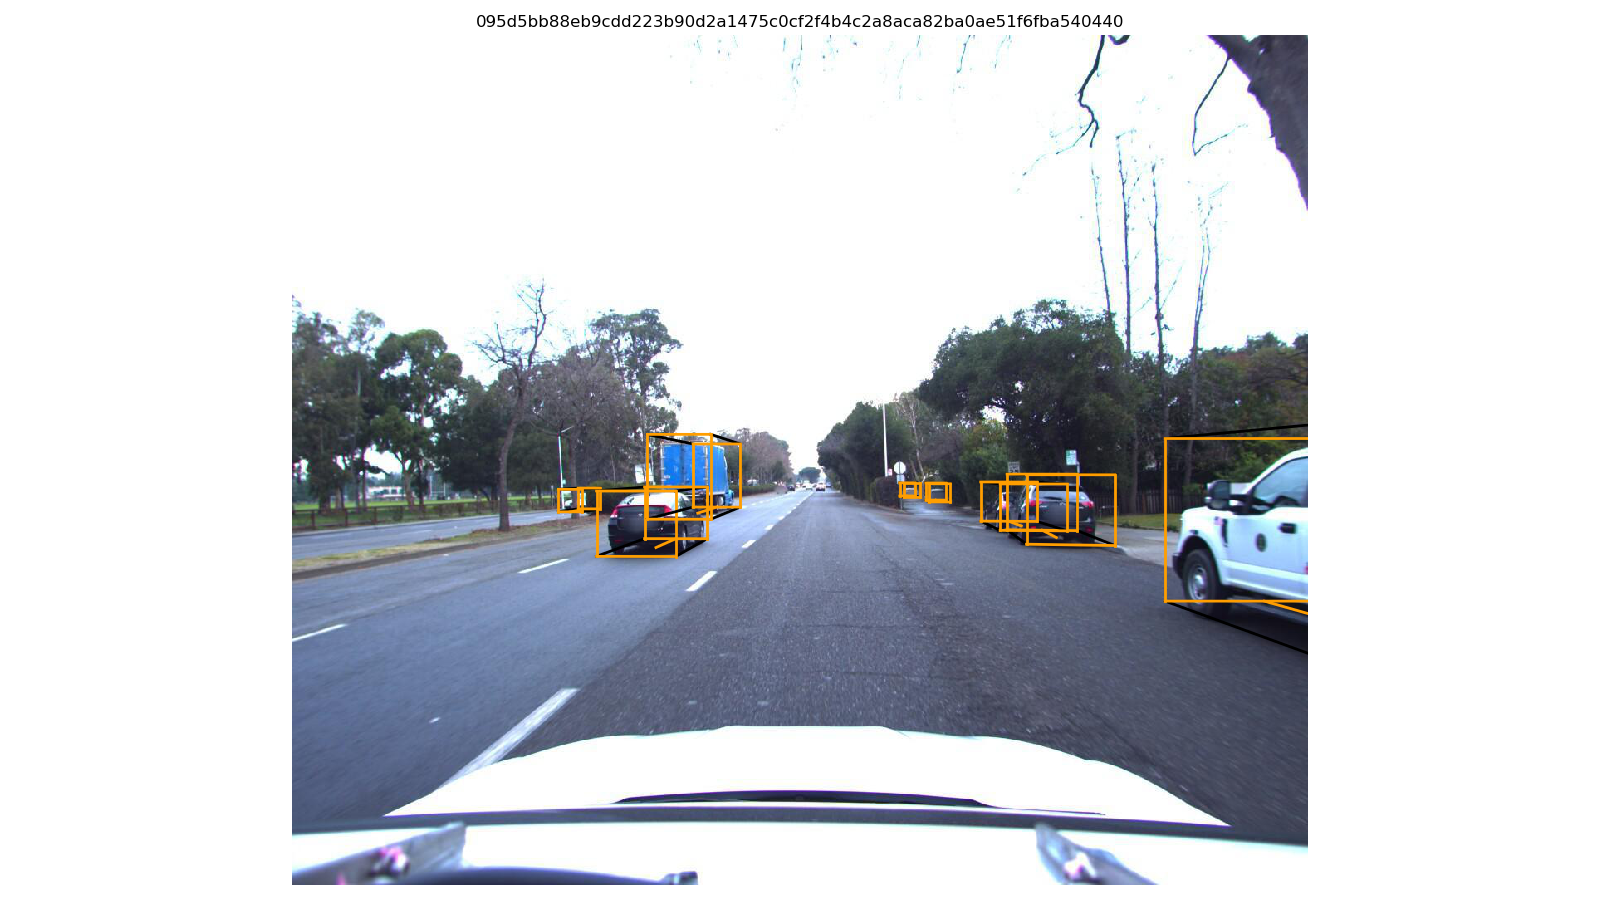

In [15]:
Image.open(all_renders[0])

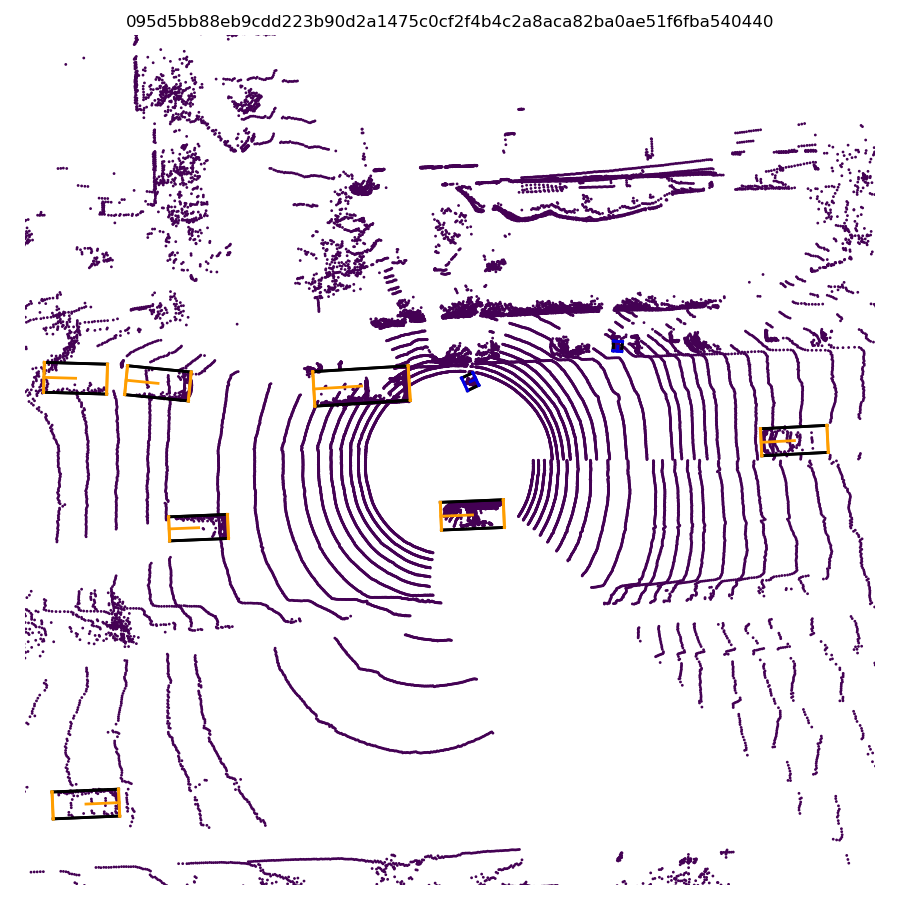

In [16]:
Image.open(all_renders[1])

### Here, rendering was used to check the success of the converting. 

### Another use could be to visualize neural network predictions for the lyft test dataset.

In [17]:
#!rm -rf {STORE_DIR} #remove storing directory